# Imports

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data exploration

In [3]:
heart_data.shape

(303, 14)

In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


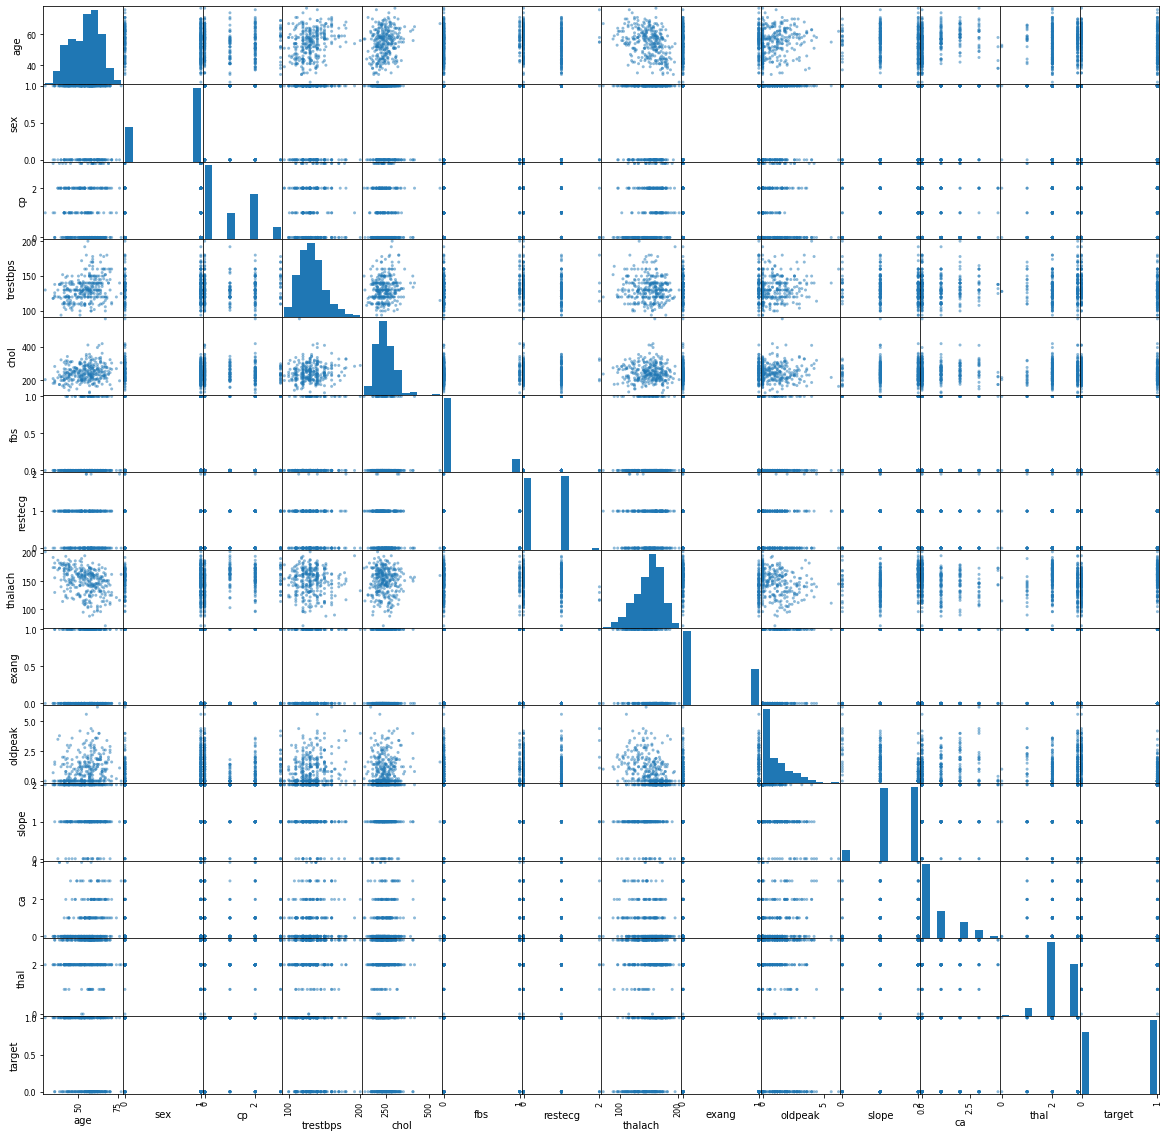

In [5]:
pd.plotting.scatter_matrix(heart_data, figsize=(20, 20))
plt.savefig('scatter_matrix.jpg')
plt.show()

In [6]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


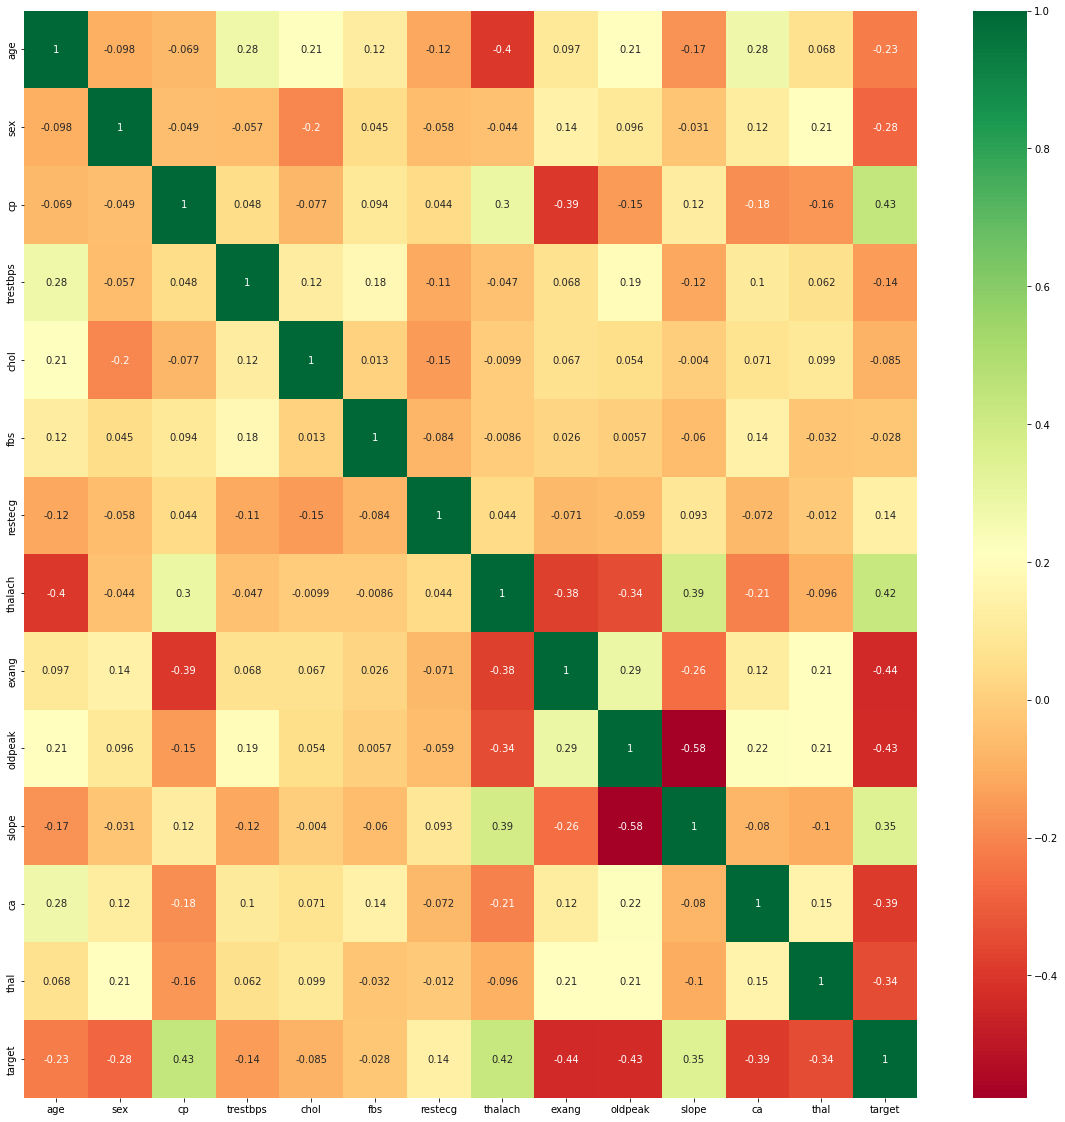

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(heart_data.corr(),annot=True,cmap="RdYlGn")
plt.savefig('corr.jpg')
plt.show()

# Logistic Regression

In [8]:
class LogiReg:    
    def __init__(self, lr=0.001, iters_num=100, log=True):
        self.lr = lr
        self.iters_num = iters_num
        self.weights = None
        self.log = log
    

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def b_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        # concatinate them to the value of X
        return np.concatenate((intercept, X), axis=1)


    def fit (self, X, y):      
        # initialize parameters
        X = self.b_intercept(X)
        self.weights = np.zeros(X.shape[1])
        
        # gradient descent
        for i in range(self.iters_num):
            
            z = np.dot(X, self.weights)
            # apply sigmoid function
            y_pred = self.sigmoid(z)
            
            # compute gradients
            grad = np.dot(X.T, (y_pred - y)) / y.size
            self.weights -= self.lr * grad

            # new W * Xi
            new_z = np.dot(X, self.weights)
            y_pred = self.sigmoid(new_z)
            
            # calculate loss 
            loss = self.loss(y_pred, y)
            if i % 100 == 0 and self.log:
                print(f'iteration #{i}, loss = {loss}')

            
    def loss(self, y_pred, y):
        return (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
    
    # predict the probability values
    def predict_prob(self, X):
        X = self.b_intercept(X)
        z = np.dot(X, self.weights)
        return self.sigmoid(z)
    
    # predict the actual values 0 or 1 using round
    def predict(self, X):
        return self.predict_prob(X).round()

In [9]:
model = LogiReg(0.01, 3000)

# Data preprocessing

In [10]:
# creating features and labels matrices
X = heart_data.drop(['target'], axis=1) # axis =1 because of we deal with coloumn
y = heart_data['target']   

In [11]:
# normalization step
X = (X-X.mean())/X.std()

In [12]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# All features

### Model training

In [13]:
model.fit(X_train, y_train)

iteration #0, loss = 0.6899513425649656
iteration #100, loss = 0.5080874138342651
iteration #200, loss = 0.4434654806586477
iteration #300, loss = 0.4126782301146911
iteration #400, loss = 0.395135628962435
iteration #500, loss = 0.3839824082850972
iteration #600, loss = 0.37636232794764624
iteration #700, loss = 0.37088798112082094
iteration #800, loss = 0.3668077919367627
iteration #900, loss = 0.36368039187628926
iteration #1000, loss = 0.36123006516245904
iteration #1100, loss = 0.35927600560309153
iteration #1200, loss = 0.35769492735406383
iteration #1300, loss = 0.3564000366595718
iteration #1400, loss = 0.35532858424449393
iteration #1500, loss = 0.354434174928488
iteration #1600, loss = 0.35368184113103557
iteration #1700, loss = 0.3530447876229182
iteration #1800, loss = 0.3525021822418355
iteration #1900, loss = 0.3520376211278857
iteration #2000, loss = 0.3516380404969885
iteration #2100, loss = 0.3512929309376693
iteration #2200, loss = 0.3509937609081084
iteration #2300, 

### Evaluation

In [14]:
def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

def plot_regression(X, y, model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')
    plt.show()

In [15]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy(y_test, predictions))

Accuracy: 0.8360655737704918


# Learning rate

In [16]:
lrs = [0.1, 0.01, 0.001, 0.0001]
acc = list()
for lr in lrs:
    model = LogiReg(lr, 10000, False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc.append(accuracy(y_test, predictions))
    
best_lr = lrs[acc.index(max(acc))]
print('Best learning rate is', best_lr)

Best learning rate is 0.1


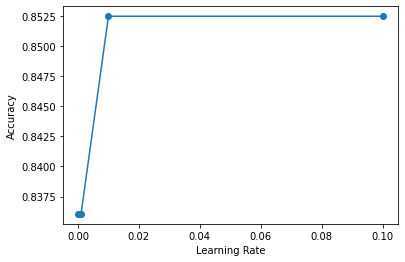

In [17]:
plt.plot(lrs, acc, '-o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.savefig('lrs.jpg')
plt.show()


# Number of iterations

In [18]:
its = [10, 100, 1000, 10000]
acc = list()
for it in its:
    model = LogiReg(best_lr, it, False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc.append(accuracy(y_test, predictions))

best_it = its[acc.index(max(acc))]
print('Best number of iterations is', best_it)

Best number of iterations is 1000


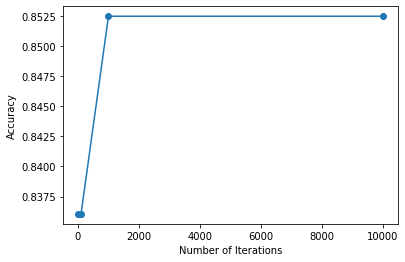

In [19]:
plt.plot(its, acc, '-o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.savefig('its.jpg')
plt.show()


# Feature pairs (random)

In [20]:
def pipeline(X, y, lr=0.01, it=3000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LogiReg(lr, it, False)
    model.fit(X_train, y_train)
    return model, round(accuracy(y_test, model.predict(X_test)), 5)*100

Trial #1 with features: chol and restecg, accuracy: 63.934000000000005 %


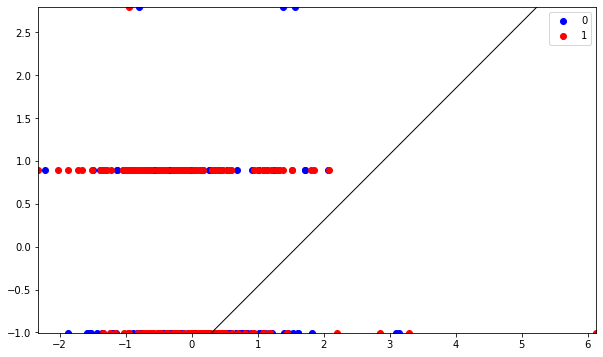

Trial #2 with features: chol and sex, accuracy: 49.18 %


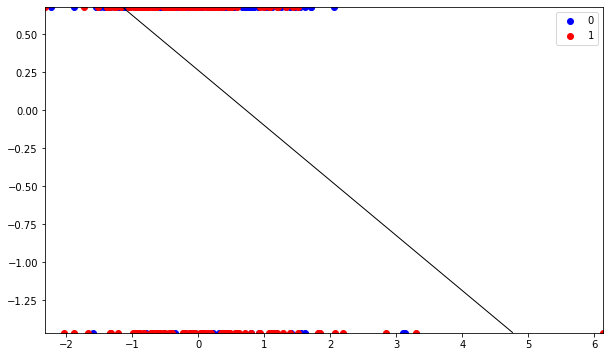

Trial #3 with features: trestbps and restecg, accuracy: 59.016000000000005 %


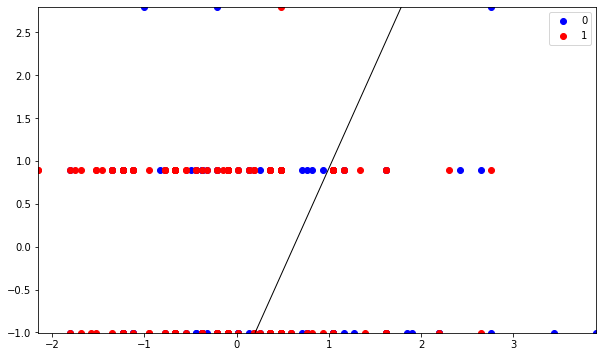

Trial #4 with features: age and sex, accuracy: 57.377 %


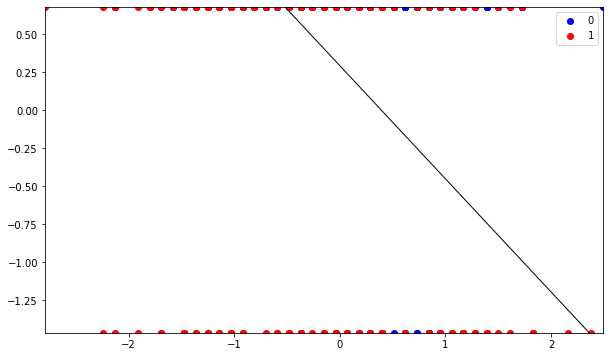

Trial #5 with features: trestbps and exang, accuracy: 72.131 %


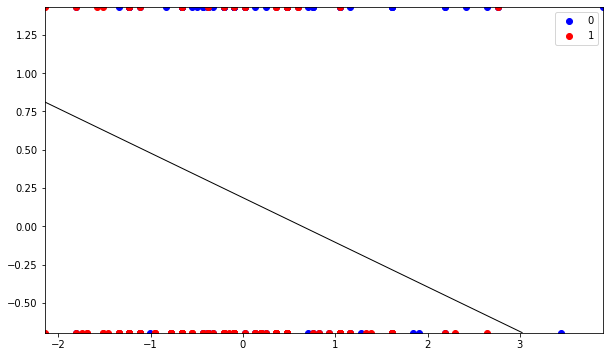

In [21]:
for i in range(5):
    # Pick two features
    f1 = np.random.choice(X.columns.values)
    f2 = f1
    while f2 == f1:
        f2 = np.random.choice(X.columns.values)
    # Train model
    model, acc = pipeline(X[[f1, f2]], y)
    print(f"Trial #{i+1} with features: {f1} and {f2}, accuracy: {acc} %")
    
    newX = X[[f1, f2]].to_numpy()
    plot_regression(newX, y, model)


# Feature pairs (based on correlation)

Trial #1 with features: cp and thalach, accuracy: 78.689 %


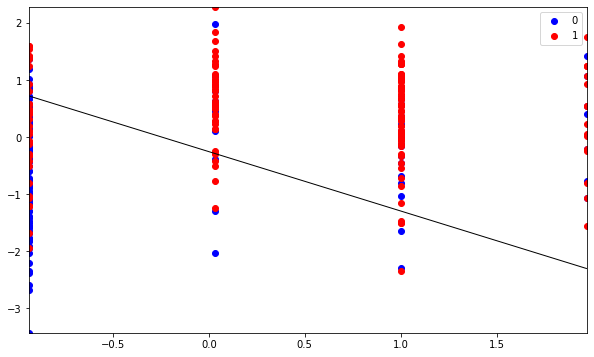

Trial #2 with features: oldpeak and exang, accuracy: 77.049 %


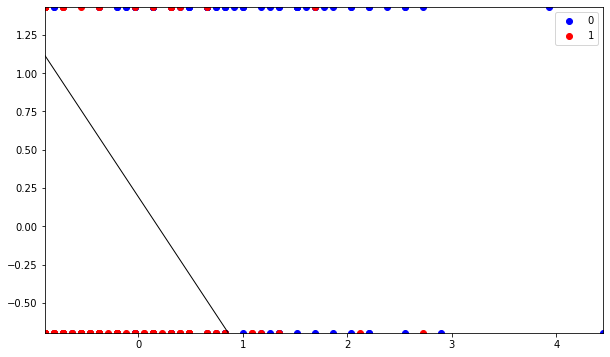

Trial #3 with features: ca and thal, accuracy: 70.492 %


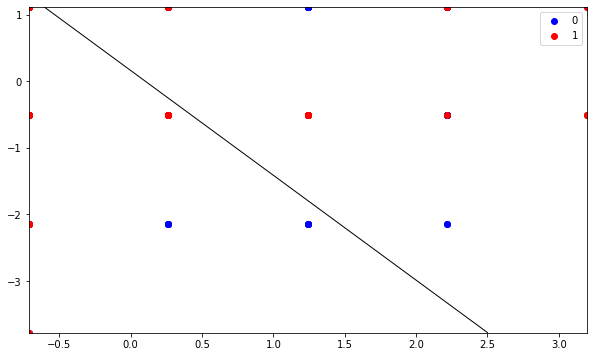

In [22]:
pairs = [['cp', 'thalach'], ['oldpeak', 'exang'], ['ca', 'thal']]
for i, pair in enumerate(pairs):
    f1, f2 = pair
    model, acc = pipeline(X[[f1, f2]], y)
    print(f"Trial #{i+1} with features: {f1} and {f2}, accuracy: {acc} %")
    
    newX = X[[f1, f2]].to_numpy()
    plot_regression(newX, y, model)
